# **Hierarchical Clustering Text Clustering**
É uma técnica muito utilizada, que tenta encontrar uma hierarquia de clusters, combinando e separando elementos de uma forma gulosa, um algoritmo guloso.

### **Clustering Text**
Text clustering é o processo de agrupamento de palavras, acontece a partir do momento em que identificamos similaridade entre textos, páginas web, emails e etc.

### **Install**

In [6]:
!pip install contractions

     -------------------------------------- 289.9/289.9 kB 2.0 MB/s eta 0:00:00


### **Imports**

In [2]:
import pandas as pd
import contractions
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

%matplot inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
UsageError: Line magic function `%matplot` not found.


### **Load Data**

In [3]:
df = pd.read_csv('./datasets/tmdb_5000_movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### **Functions**

In [4]:
def normalize_document(doc):
    # Lower case and remove special chars/whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I | re.A)
    doc = doc.lower()
    doc = doc.strip()
    doc = contractions.fix(doc)
    
    # Tokenize
    tokens = nltk.word_tokenize(doc)
    
    # Filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # re-create document from filtered tokens
    return " ".join(filtered_tokens)

def averaged_word2vec_vectorize(corpus, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    
    def average_word_vectors(words, model, vocabulary, num_features):
        feature_vector = np.zeros((num_features), dtype="float64")
        nwords = 0.
        
        for word in words:
            if word in vocabulary:
                nwords = nwords + 1;
                feature_vector = np.add(feature_vector, model.wv[word])
        
        if nwords:
            feature_vector = np.divide(feature_vector, nwords)
            
        return feature_vector
    
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features) for tokenized_sentence in corpus]
    
    return np.array(features)

def ward_hierarchical_clustering(feature_matrix):
    cosine_distance = 1 - cosine_similarity(feature_matrix)
    return ward(cosine_distance)

def plot_hierarchical_clusters(linkage_matrix, data, p=100, figure_size=(8, 12)):
    # Set size
    fig, ax = plt.subplots(figsize=figure_size)
    data_titles = data['title'].values.tolist()
    
    # Plot dendrogram
    R = dendrogram(linkage_matrix, orientation='left', labels=data_titles, truncate_mode='lastp', p=p, no_plot=True)
    temp = {R['leaves'][ii]: data_titles[ii] for ii in range(len(R['leaves']))}
    
    def llf(xx):
        return "{}".format(temp[xx])
    
    ax = dendrogram(linkage_matrix, truncate_mode='lastp', orientation='left', p=p, leaf_label_func=llf, leaf_font_size=10.)
    plt.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off')
    plt.tight_layout()
    plt.savefig('./images/hierarchical_clusters.png', dpi=200)

### **See Data and Preprocessing**

In [5]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [6]:
df = df[['title', 'tagline', 'overview', 'popularity']]
df.tagline.fillna('', inplace=True)
df['description'] = df['tagline'].map(str) + ' ' + df['overview']
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4800 entries, 0 to 4802
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        4800 non-null   object 
 1   tagline      4800 non-null   object 
 2   overview     4800 non-null   object 
 3   popularity   4800 non-null   float64
 4   description  4800 non-null   object 
dtypes: float64(1), object(4)
memory usage: 225.0+ KB


C:\Users\Daniel\AppData\Local\Temp\ipykernel_24452\393848218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tagline.fillna('', inplace=True)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_24452\393848218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['tagline'].map(str) + ' ' + df['overview']
C:\Users\Daniel\AppData\Local\Temp\ipykernel_24452\393848218.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [7]:
df

,title,tagline,overview,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...",43.926995,"Lost in our world, found in another. John Cart..."
...,...,...,...,...,...
4798,El Mariachi,"He didn't come looking for trouble, but troubl...",El Mariachi just wants to play his guitar and ...,14.269792,"He didn't come looking for trouble, but troubl..."
4799,Newlyweds,A newlywed couple's honeymoon is upended by th...,A newlywed couple's honeymoon is upended by th...,0.642552,A newlywed couple's honeymoon is upended by th...
4800,"Signed, Sealed, Delivered",,"""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"""Signed, Sealed, Delivered"" introduces a dedi..."
4801,Shanghai Calling,A New Yorker in Shanghai,When ambitious New York attorney Sam is sent t...,0.857008,A New Yorker in Shanghai When ambitious New Yo...


In [8]:
normalize_corpus = np.vectorize(normalize_document)
norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

### **Text Representation**
A máquina tem que calcular a similaridade entre eles, então ela precisa da representação textual

### **Count Vectors**

In [9]:
stop_words = stop_words + ['one', 'two', 'three', 'four', 'five', 'get']
cv = CountVectorizer(ngram_range=(1, 2), min_df=0.001, max_df=0.99, stop_words=stop_words)
ft_matrix_count_vectorize = cv.fit_transform(norm_corpus)
ft_matrix_count_vectorize.shape

(4800, 6100)

In [10]:
norm_corpus

array(['enter world pandora 22nd century paraplegic marine dispatched moon pandora unique mission becomes torn following orders protecting alien civilization',
       'end world adventure begins captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seems',
       'plan one escapes cryptic message bonds past sends trail uncover sinister organization battles political forces keep secret service alive bond peels back layers deceit reveal terrible truth behind spectre',
       ...,
       'signed sealed delivered introduces dedicated quartet civil servants dead letter office us postal system transform elite team lostmail detectives determination deliver seemingly undeliverable takes post office unpredictable world letters packages past save lives solve crimes reunite old loves change futures arriving late always miraculously time',
       'new yorker shanghai ambitious new york attorney sam sent shanghai assignment immediately stumbles le

### **Word Embeddings**

In [11]:
tokenized_docs = [doc.split() for doc in norm_corpus]
ft_model = Word2Vec(tokenized_docs, vector_size=300, window=150, min_count=10, sample=1e-3)
ft_matrix_word2vec = averaged_word2vec_vectorize(corpus=tokenized_docs, model=ft_model, num_features=300)
ft_matrix_word2vec.shape

(4800, 300)

### **Hierarchical Clustering Count Vectorize**

In [12]:
linkage_matrix = ward_hierarchical_clustering(ft_matrix_count_vectorize)

In [13]:
np.set_printoptions(suppress=True)
print(linkage_matrix)

[[4399.         4635.            0.            2.        ]
 [4455.         4665.            1.22566261    2.        ]
 [1901.         3703.            1.39865409    2.        ]
 ...
 [9593.         9595.           34.34943172 3635.        ]
 [9587.         9596.           39.16156478 4074.        ]
 [9588.         9597.           51.37672048 4800.        ]]


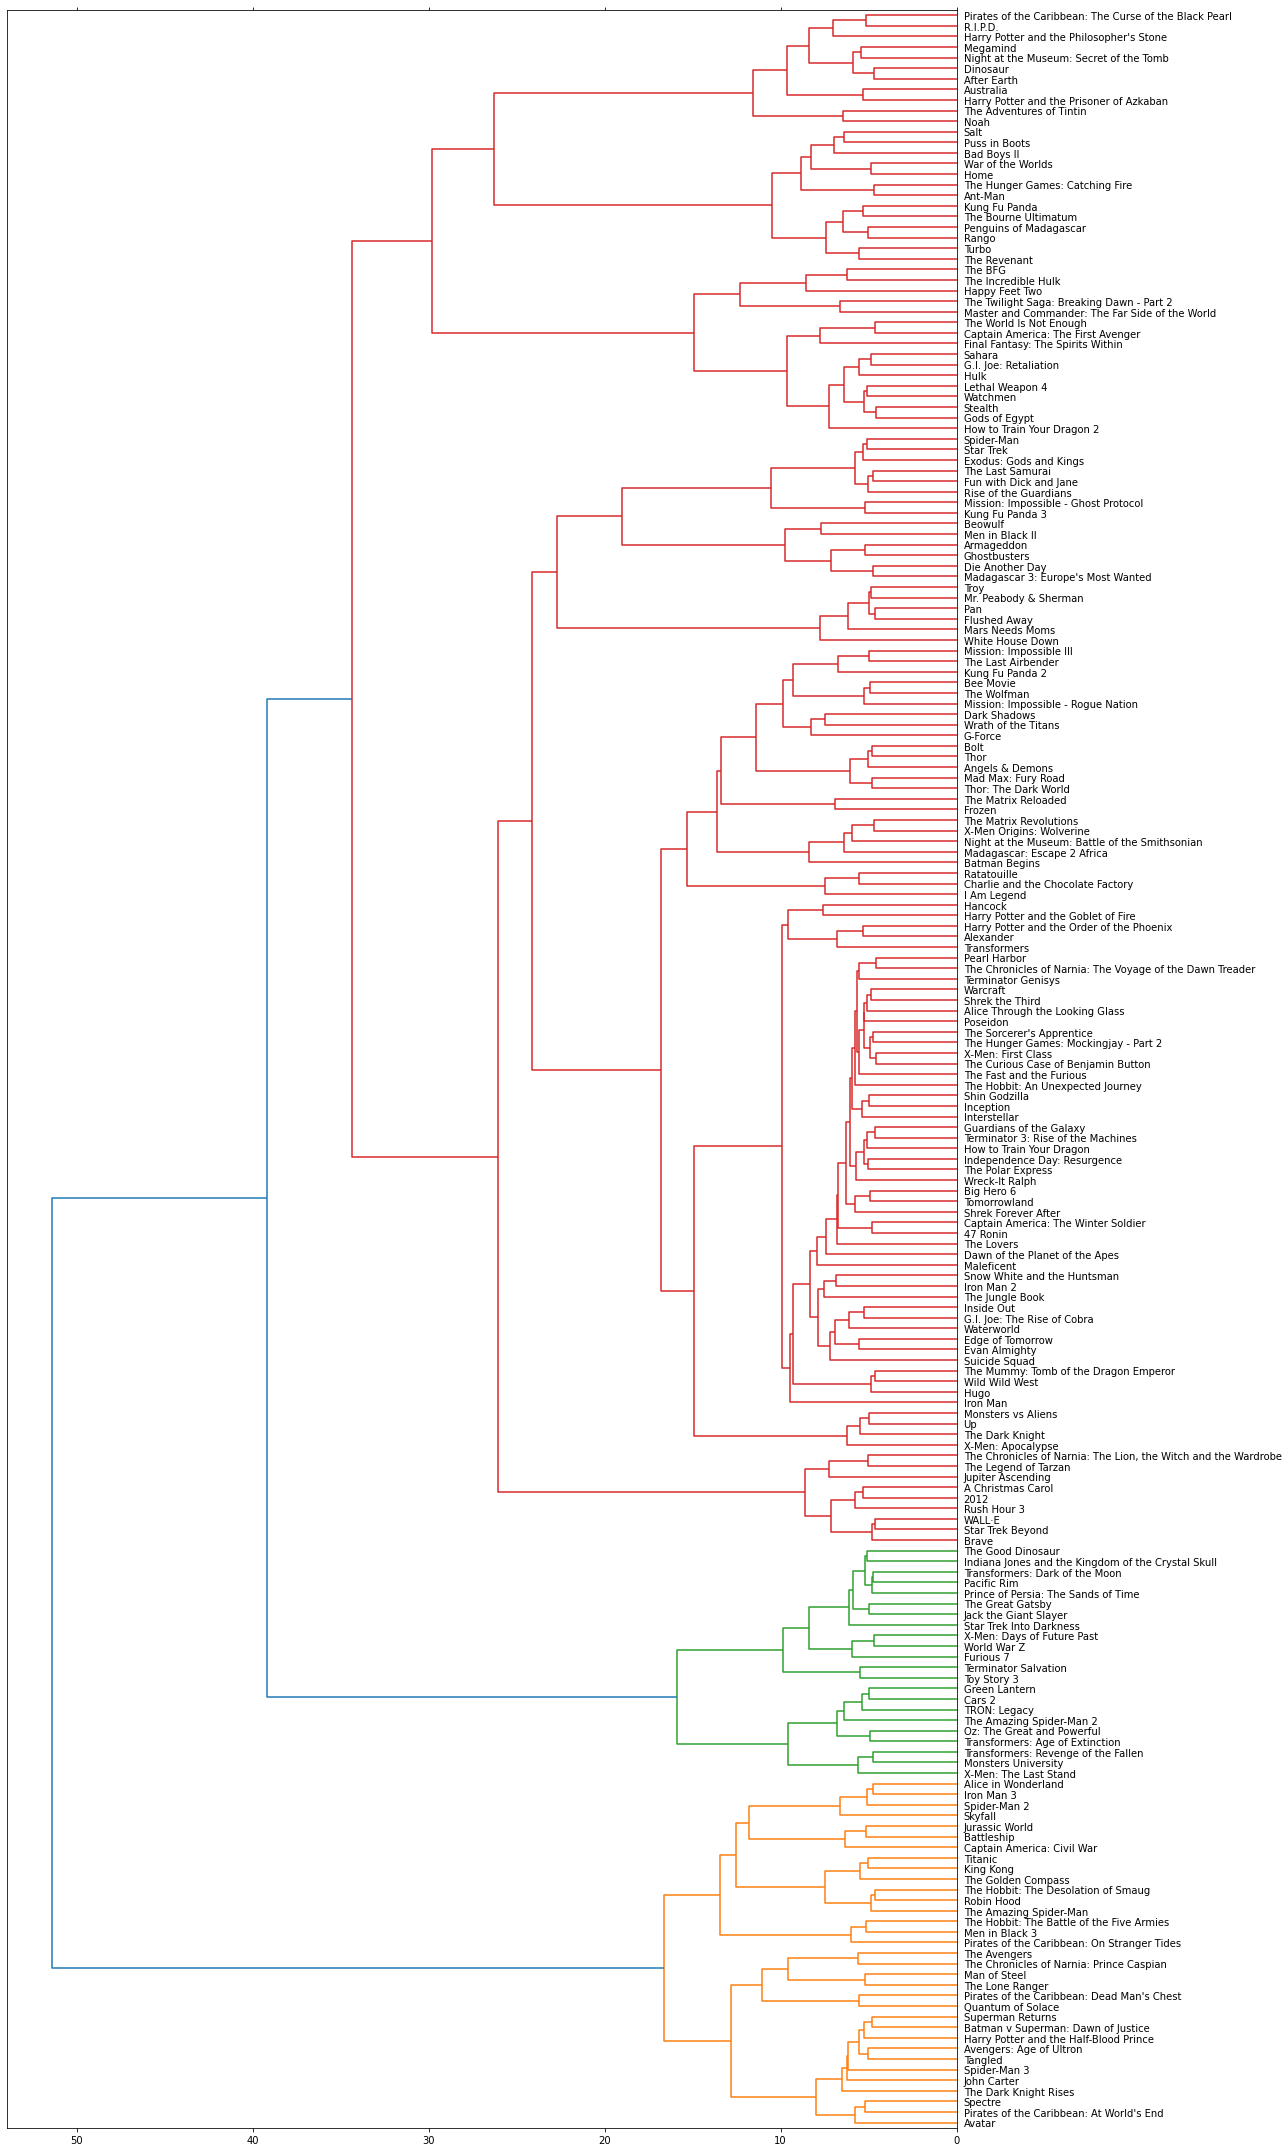

In [14]:
plot_hierarchical_clusters(linkage_matrix, p=200, data=df, figure_size=(18, 30))

### **Hierarchical Clustering Word2Vec**

In [15]:
linkage_matrix = ward_hierarchical_clustering(ft_matrix_word2vec)

In [16]:
np.set_printoptions(suppress=True)
print(linkage_matrix)

[[4399.         4635.            0.            2.        ]
 [3137.         4036.            0.0001003     2.        ]
 [2007.         3430.            0.00011364    2.        ]
 ...
 [9593.         9595.            0.1195976   955.        ]
 [9594.         9596.            0.15112103 4798.        ]
 [4800.         9597.          138.49779593 4800.        ]]


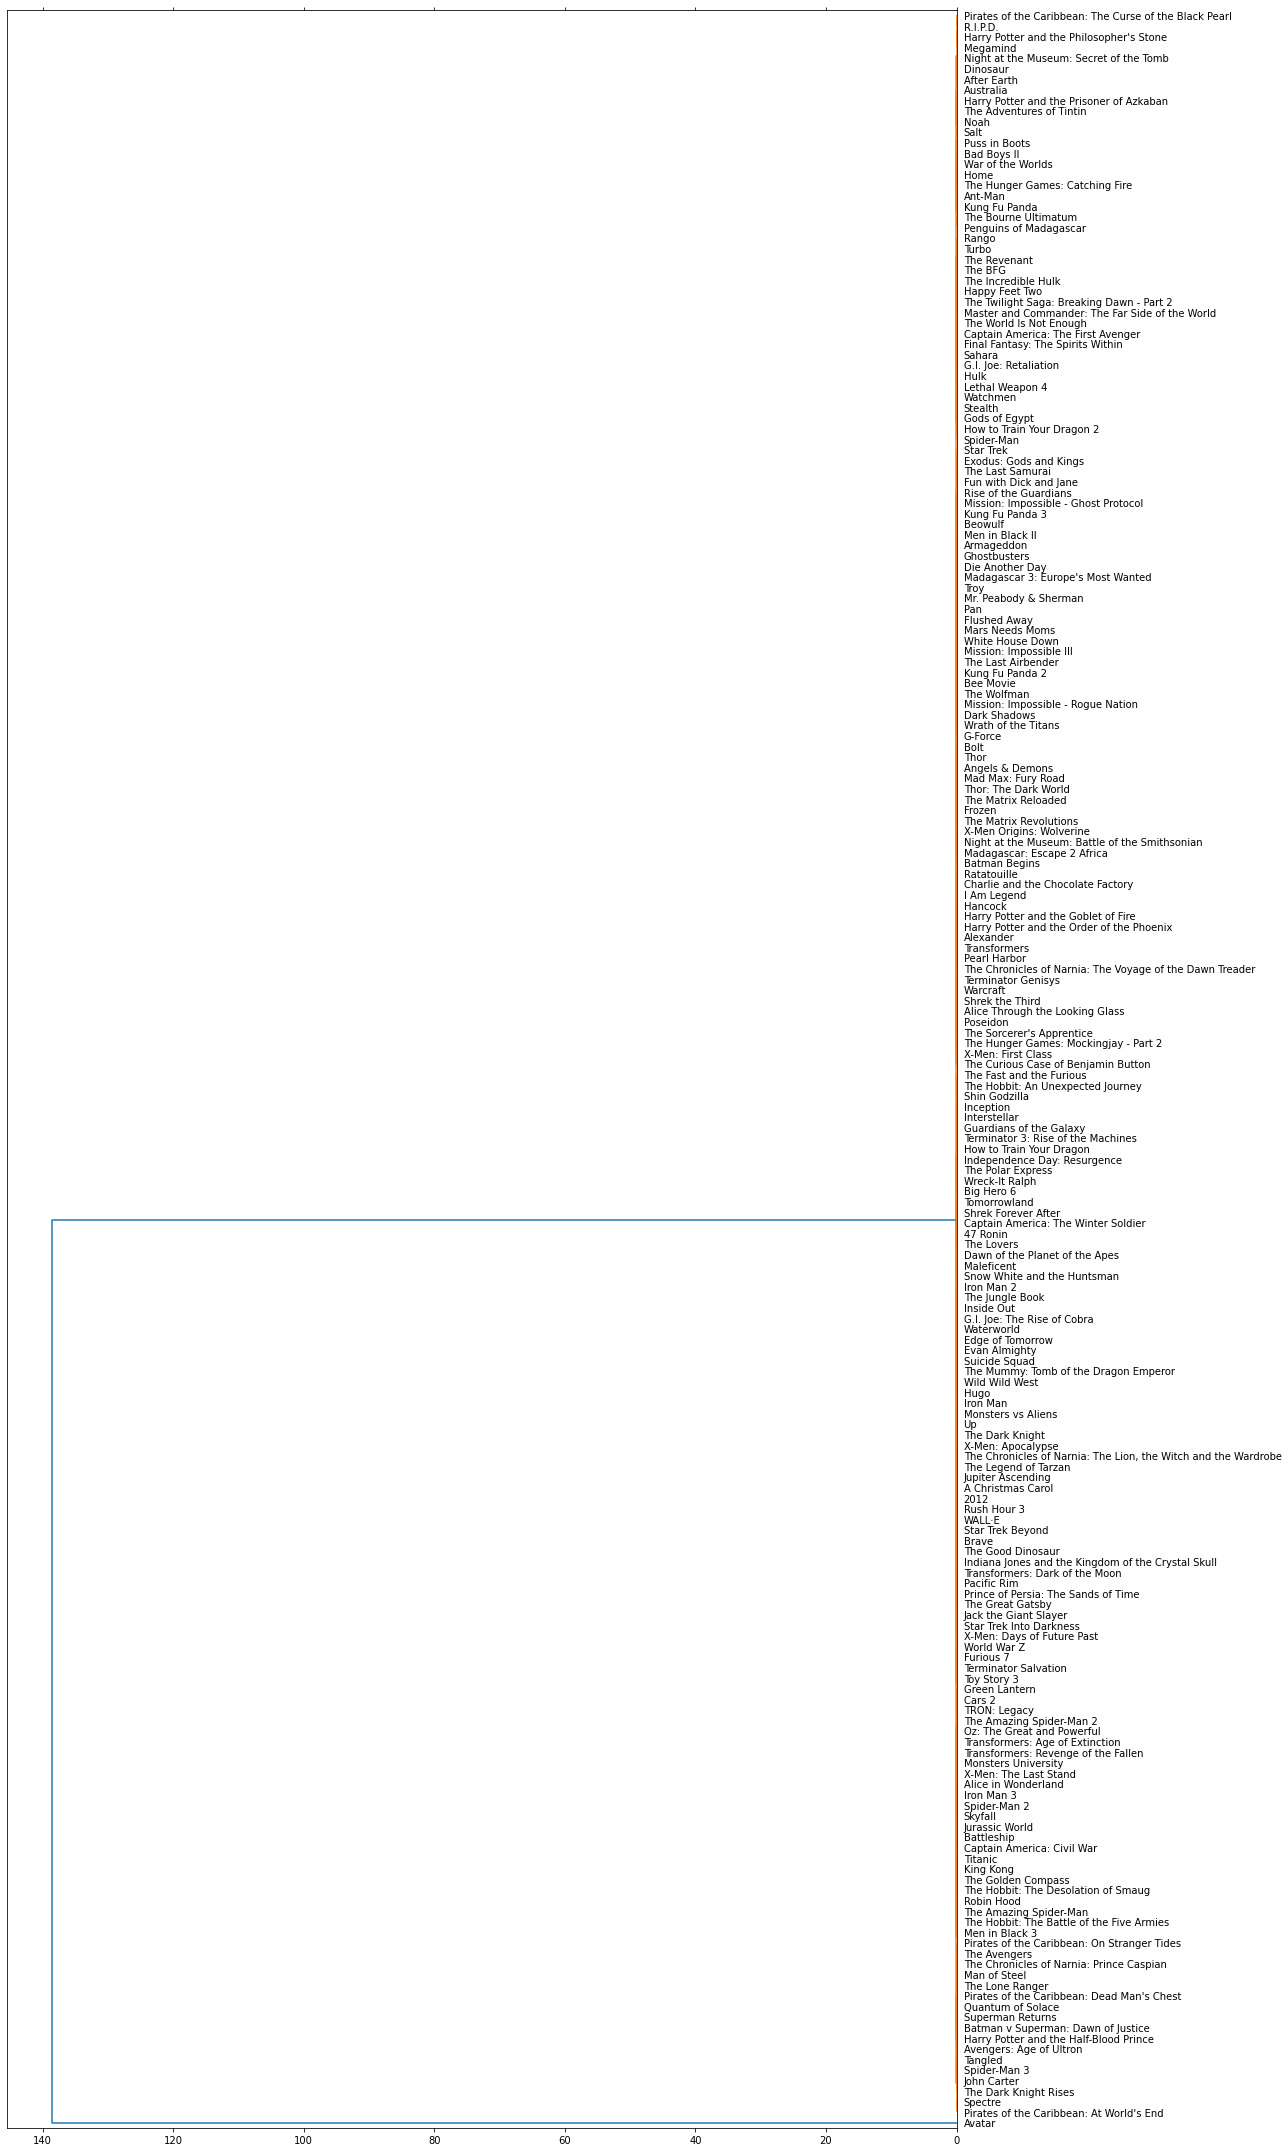

In [17]:
plot_hierarchical_clusters(linkage_matrix, p=200, data=df, figure_size=(18, 30))